# 05 Evaluation


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import logging
import pandas as pd

# Import lightgbm first to avoid issues with pytorch and segfault
from lightgbm import LGBMRanker

sys.path.append("..")

from src.utils.core_utils import setup_logging


# Initialize logging
file_log = "evaluation.log"
root_logger = setup_logging(level=logging.DEBUG, log_file=file_log, remove_existing=True)

2025-06-04 16:43:33,201 - src.utils.core_utils - INFO - Creating file handler with level: 10
2025-06-04 16:43:33,202 - src.utils.core_utils - DEBUG - Logging setup complete to evaluation.log


In [3]:
from src.eval import RankerEvaluatorPipeline, RankerEvaluatorConfig

2025-06-04 16:43:33,268 - matplotlib - DEBUG - CACHEDIR=/Users/sharonshiao/.matplotlib
2025-06-04 16:43:33,271 - matplotlib.font_manager - DEBUG - Using fontManager instance from /Users/sharonshiao/.matplotlib/fontlist-v390.json
/Users/sharonshiao/Dropbox/Machine_learning/projects/fahsion_recommendation/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Pipeline


In [4]:
evaluator_config = RankerEvaluatorConfig.get_default_config()

In [5]:
evaluator_pipeline = RankerEvaluatorPipeline(evaluator_config)

In [6]:
evaluator_pipeline.setup()

2025-06-04 16:43:36,435 - src.eval - INFO - Setting up ranker evaluator pipeline
2025-06-04 16:43:36,436 - src.eval - DEBUG - Config: {
  "sample": [
    "valid",
    "test"
  ],
  "subsample": 0.05,
  "seed": 42,
  "config_evaluator": {
    "k": 12,
    "heuristic_strategy": "rolling_popular_items"
  },
  "experiment_name": "fashion_recommendation",
  "run_id": "918c14f84c5d4c49b20461053dd198c7"
}
2025-06-04 16:43:36,436 - src.eval - INFO - Evaluator setup complete


2025-06-04 16:43:36,458 - src.eval - INFO - Running ranker evaluator pipeline
2025-06-04 16:43:36,459 - src.eval - INFO - Loading ranker model
2025-06-04 16:43:36,507 - src.eval - INFO - Loading data: ['valid', 'test']
2025-06-04 16:43:36,622 - src.input_preprocessing - INFO - Metadata loaded: {'has_label': False, 'has_group': True, 'use_type': 'inference', 'sample': 'valid', 'has_default_prediction': True}
2025-06-04 16:43:36,623 - src.input_preprocessing - INFO - Loaded group from ../data/model/input_inference/valid/subsample_0.05_42/group.npy
2025-06-04 16:43:36,624 - src.input_preprocessing - INFO - Loaded default prediction from ../data/model/input_inference/valid/subsample_0.05_42/default_prediction.npy
2025-06-04 16:43:36,625 - src.feature_extraction - INFO - Loading optimized raw data from candidates_to_articles_mapping valid 0.05 42
2025-06-04 16:43:36,625 - src.feature_extraction - DEBUG - Loading data from ../data/candidates_to_articles_mapping_valid_sample_0.05_42.json
2025

                       feature  importance
23             bestseller_rank    0.816495
19                 postal_code    0.100771
22  image_embedding_similarity    0.045891
21   text_embedding_similarity    0.015071
0              product_type_no    0.007931
5                department_no    0.007155
13      cumulative_sales_count    0.002777
11            weekly_avg_price    0.001042
10          weekly_sales_count    0.001020
2            colour_group_code    0.000644
12         cumulative_mean_age    0.000369
8                   section_no    0.000301
1      graphical_appearance_no    0.000222
26            price_difference    0.000143
27                 price_ratio    0.000138
25                   age_ratio    0.000012
3    perceived_colour_value_id    0.000009
4   perceived_colour_master_id    0.000005
9             garment_group_no    0.000003
24              age_difference    0.000002
15          club_member_status    0.000000
16      fashion_news_frequency    0.000000
17         

2025-06-04 16:43:37,476 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/AssetsV2/com_apple_MobileAsset_Font7/aa99d0b2bad7f797f38b49d46cde28fd4b58876e.asset/AssetData/Xingkai.ttc', name='Xingkai SC', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2025-06-04 16:43:37,476 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Comic Sans MS.ttf', name='Comic Sans MS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2025-06-04 16:43:37,477 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFCamera.ttf', name='.SF Camera', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2025-06-04 16:43:37,477 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/usr/X11/lib/X11/fonts/TTF/GohaTibebZemen.ttf', name='Goha-Tibeb Zemen', style='n

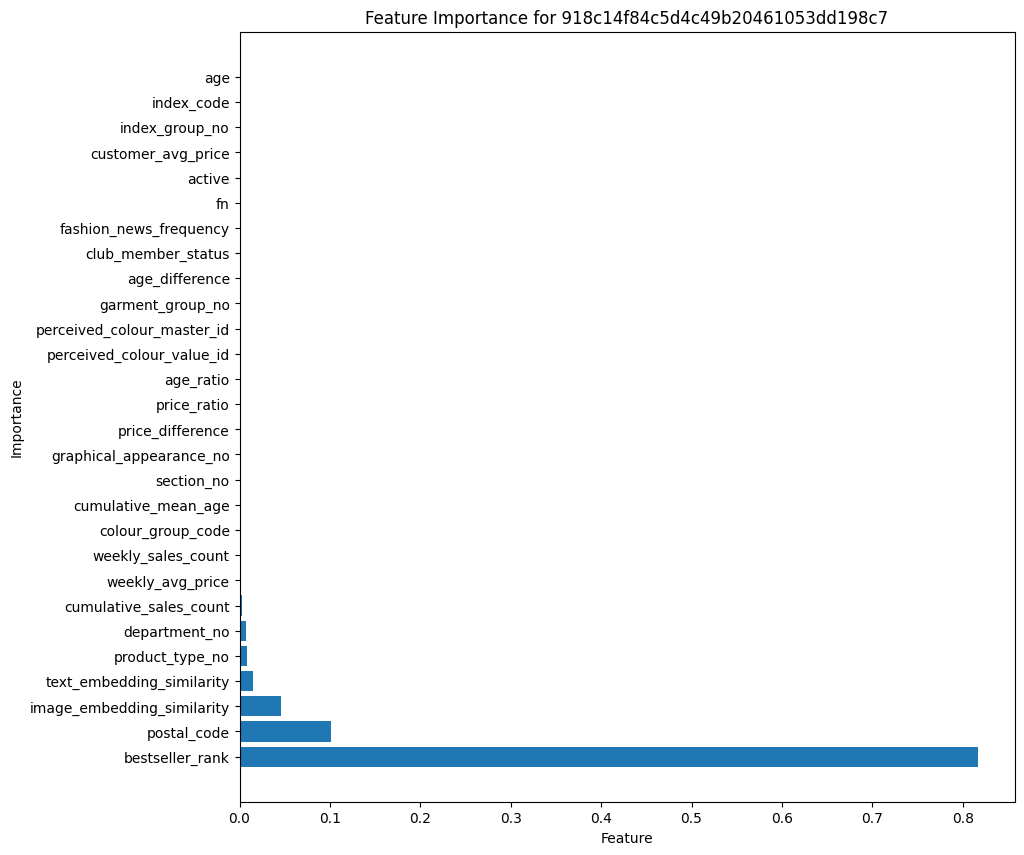

In [7]:
results = evaluator_pipeline.run()

In [8]:
pd.DataFrame(results)

,valid,test
mapk_model,0.023073,0.020557
mapk_heuristic,0.004012,0.010304
mapk_ideal,0.046676,0.047424


In [9]:
evaluator_pipeline.ranker.model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 0.9805268852942068,
 'importance_type': 'gain',
 'learning_rate': 0.09619956645222151,
 'max_depth': -1,
 'min_child_samples': 75,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 345,
 'n_jobs': None,
 'num_leaves': 280,
 'objective': 'lambdarank',
 'random_state': 111,
 'reg_alpha': 96.91574404040995,
 'reg_lambda': 83.77826477431071,
 'subsample': 0.7928253521248246,
 'subsample_for_bin': 200000,
 'subsample_freq': 2,
 'metrics': 'ndcg',
 'feature_pre_filter': True,
 'verbosity': -1}